# Brain Tumor Detection

In [16]:
!pip install opencv-python

  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

# Collect Data

In [18]:
import os

path = os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [20]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [21]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [22]:
np.unique(Y)

array([0, 1])

In [23]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [24]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

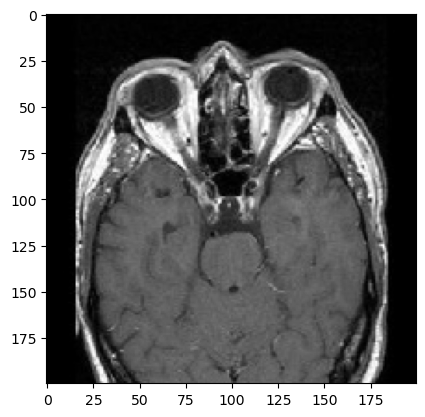

In [25]:
plt.imshow(X[0], cmap='gray')

In [26]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [28]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [29]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Principal Component Analysis (PCA) 

In [30]:
from sklearn.decomposition import PCA

In [31]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

# Support Vector Machine(SVM)

In [34]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [35]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [38]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


# Predictions

In [40]:
pred = sv.predict(xtest)

In [41]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [42]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


In [43]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

# Testing Our Model

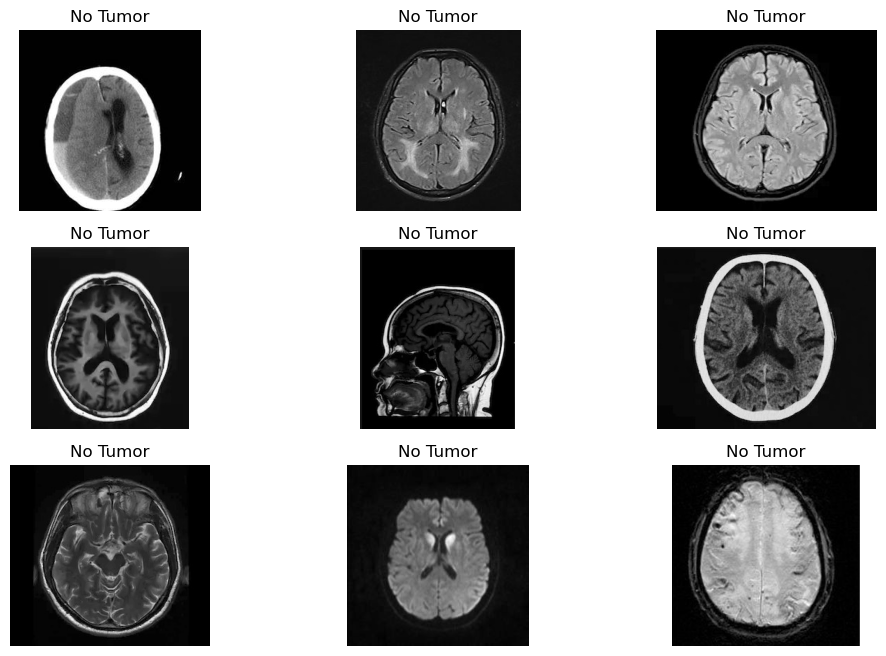

In [46]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/')
c=1
for i in os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

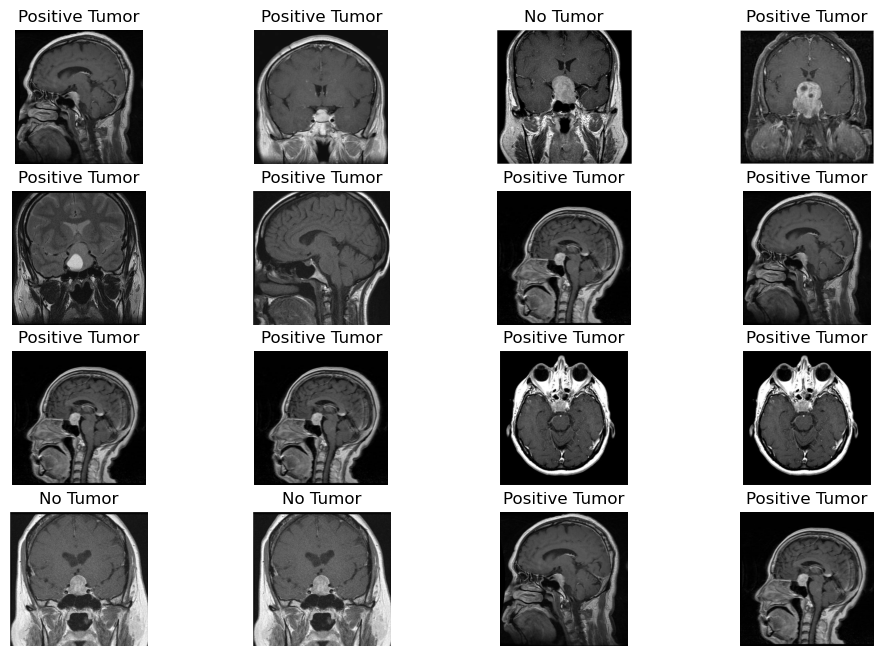

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/')
c=1
for i in os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/archive (2)/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

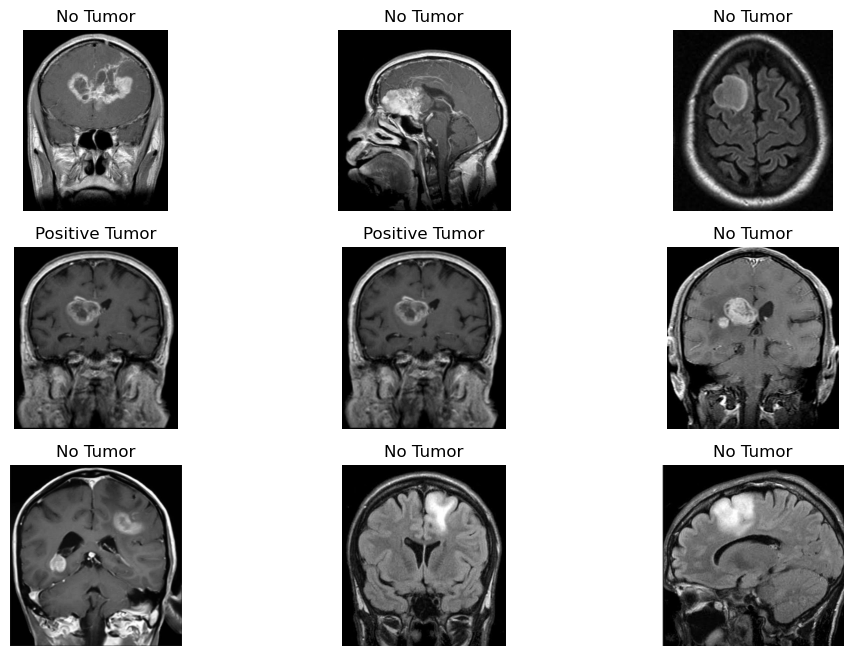

In [62]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing')
c=1
for i in os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing/glioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

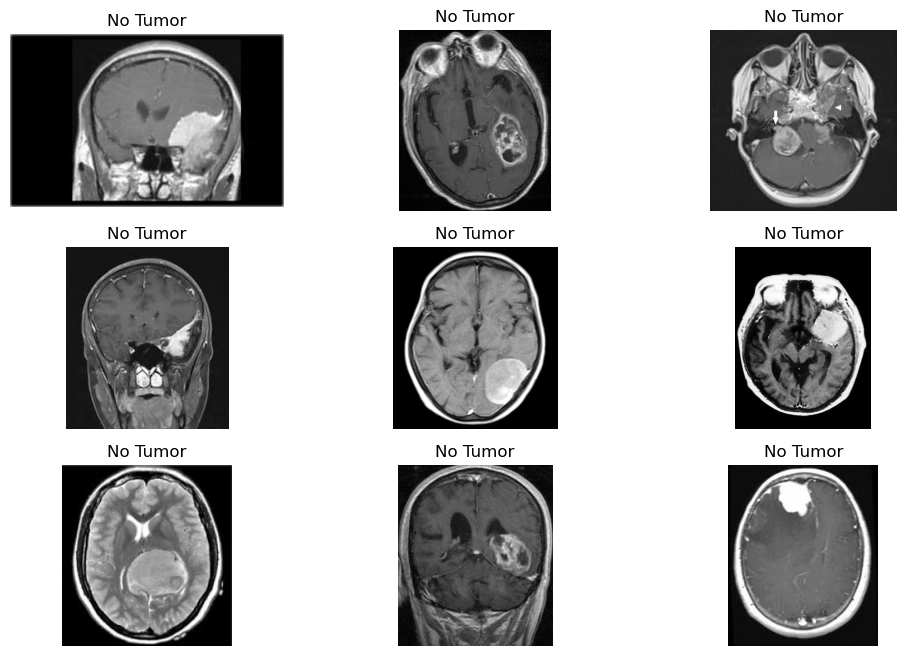

In [63]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing')
c=1
for i in os.listdir('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing/meningioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/STUDY/Sem 5/SGP - Multiple Diseases Prediction WebApp/All model/archive (2)/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [64]:
!pip install tensorflow


  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [65]:
!pip install --upgrade numpy


  Using cached numpy-1.25.1-cp39-cp39-win_amd64.whl (15.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.25.1 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.25.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.25.1 which is incompatible.


# Saving Our SVM Model

In [66]:
import joblib

In [67]:
joblib.dump(sv, 'brain_tumor_detection_model.joblib')

['brain_tumor_detection_model.joblib']